# Первичный анализ датасетов по ДТП


Данные взяты с сайта безопасныедороги.рф. Датасеты 2015, 2019 и 2020 годов пустые, буквально, размер файла 1 Кб.

Загрузим остальные датасеты.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
import json
import collections

In [0]:
with open('2016.json', 'r') as f:
    data2016 = json.loads(f.read()) 
with open('2017.json', 'r') as f:
    data2017 = json.loads(f.read()) 
with open('2018.json', 'r') as f:
    data2018 = json.loads(f.read()) 
df2016 = pd.DataFrame(data2016)
df2017 = pd.DataFrame(data2017)
df2018 = pd.DataFrame(data2018)

In [3]:
df2016

,reg_code,reg_name,road_code,road_name,road_type,oktmo,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,latitude,longitude
0,38,Курская область,М-2,"""Крым"" Москва - Тула - Орел - Курск - Белгород...",Федеральная дорога общего пользования,38620000,"ЦФО, Курская область, Курский район",Столкновение,20170101,02:55,Другие нарушения ПДД водителями,0,1,2,2,51.845189,36.092892
1,53,Оренбургская область,53К-0801000,Бузулук - Грачевка,Региональная или межмуниципальная дорога общег...,53612000,"ПФО, Оренбургская область, Бузулукский район",Наезд на пешехода,20170101,02:55,Ходьба вдоль проезжей части попутного направле...,0,1,1,2,52.7947,52.3261
2,81,Республика Бурятия,,,Тип дороги не определен,,"Республика Бурятия, г Улан-Удэ, ул Борсоева, 109а",Наезд на стоящее ТС,20170101,02:55,,1,0,4,4,51.8631,107.5394
3,60,Ростовская область,,,Тип дороги не определен,60615436101,"Ростовская область, х Кавалерский, ул Ленина, 47",Наезд на препятствие,20170101,02:50,,1,0,1,1,46.1342,40.0836
4,63,Саратовская область,,,Тип дороги не определен,,"Саратовская область, г Саратов, ул Симбирская,...",Наезд на препятствие,20170101,02:50,,0,2,1,2,51.5506,46.0408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113346,60,Ростовская область,,,,60701000,"Ростовская обл, г Ростов-на-Дону, пр-кт Ставск...",Наезд на препятствие,20160201,04:15,Несоответствие скорости конкретным условиям дв...,0,2,1,3,47.218687,39.684865
113347,29,Калужская область,,А-101- Спас-Деменск - Ельня - Починок,Региональная или межмуниципальная дорога общег...,29701000,"ЦФО, Калужская область, Калуга",Наезд на пешехода,20160201,04:15,,1,0,1,0,54.5109,36.2223
113348,70,Тульская область,М-2,"""Крым"" Москва - Тула - Орел - Курск - Белгород...",Федеральная дорога общего пользования,70646000,"ЦФО, Тульская область, Чернский район",Столкновение,20160201,04:00,Другие нарушения ПДД водителями,4,0,2,5,54.3453,37.843
113349,29,Калужская область,М-3,"""Украина"" Москва - Калуга - Брянск - граница с...",Федеральная дорога общего пользования,29627000,"ЦФО, Калужская область, Мещовский район",Наезд на препятствие,20160201,02:55,Несоответствие скорости конкретным условиям дв...,0,5,2,6,54.2686,35.4697


In [4]:
df2017

,reg_code,reg_name,road_code,road_name,road_type,oktmo,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,latitude,longitude
0,83,Кабардино-Балкарская Республика,,Кенделен-Зап.Кинжал,Региональная или межмуниципальная дорога общег...,83648415,"СКФО, Кабардино-Балкарская Республика, Эльбрус...",Столкновение,20180101,02:50,Неправильный выбор дистанции,1,0,2,6,43.5895,43.200277
1,20,Воронежская область,,"Воронеж - Луганск (госгранца), через Острогожс...",Региональная или межмуниципальная дорога общег...,20631000,"ЦФО, Воронежская область, Острогожский район",Опрокидывание,20180101,02:35,Нарушение правил расположения ТС на проезжей ч...,1,0,1,2,50.8183,39.1331
2,79,Республика Адыгея,М-4,"""Дон"" Москва - Воронеж - Ростов-на-Дону - Крас...",Федеральная дорога общего пользования,79703000,"ЮФО, Республика Адыгея, Адыгейск",Наезд на препятствие,20180101,02:35,Другие нарушения ПДД водителями,2,0,1,3,44.8258,39.2247
3,03,Краснодарский край,,ПОДЪЕЗД К Г.АНАПА,Региональная или межмуниципальная дорога общег...,03703000,"ЮФО, Краснодарский край, Анапский район, Анапа",Столкновение,20180101,02:30,Нарушение требований сигналов светофора,1,0,2,2,44.9056,37.3331
4,82,Республика Дагестан,Р-215,Астрахань - Кочубей - Кизляр - Махачкала,Федеральная дорога общего пользования,82607000,"СКФО, Республика Дагестан, Бабаюртовский район",Наезд на пешехода,20180101,02:30,Нахождение на проезжей части без цели её перех...,0,2,1,3,43.3158,47.4308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161132,33,Кировская область,,,Тип дороги не определен,33630154,"Кировская область, г Киров, ул Производственна...",Столкновение,20170101,03:20,,2,0,3,4,58.577538,49.609588
161133,40,Санкт-Петербург,,,Тип дороги не определен,,"Санкт-Петербург, г Санкт-Петербург, пр-кт Невс...",Наезд на препятствие,20170101,03:10,,3,0,1,4,59.9317,30.3547
161134,36,Самарская область,,,Тип дороги не определен,,"Самарская область, г Самара, ул Сергея Лазо, 21",Наезд на пешехода,20170101,03:00,,1,0,1,2,53.346007,50.221799
161135,80,Республика Башкортостан,,,Тип дороги не определен,80647460101,"Республика Башкортостан, с Терменево, ул Набер...",Наезд на пешехода,20170101,03:00,,1,0,1,2,55.0825,58.6411


In [5]:
df2018

,reg_code,reg_name,road_code,road_name,road_type,oktmo,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,latitude,longitude
0,46,Московская область,,мкр. Авиационный-Лямцино-ММК,Региональная или межмуниципальная дорога общег...,,"ЦФО, Московская область, Городской округ Домод...",Опрокидывание,20181231,23:55,Другие нарушения ПДД водителями,1,0,1,12,55.359795,37.906179
1,53,Оренбургская область,53К-2118000,Обход г. Оренбурга,Региональная или межмуниципальная дорога общег...,53701000,"ПФО, Оренбургская область, Оренбург",Наезд на препятствие,20181231,23:55,Другие нарушения ПДД водителями,1,0,1,2,51.785876,55.186837
2,46,Московская область,А-107,"""Московское малое кольцо"" Икша - Ногинск - Бро...",Федеральная дорога общего пользования,46608000,"ЦФО, Московская область, Дмитровский район",Опрокидывание,20181231,23:40,Превышение установленной скорости движения,1,0,1,2,56.137324,37.458766
3,08,Хабаровский край,А-375,"""Восток"" Хабаровск - Красный Яр - Ариадное - Ч...",Федеральная дорога общего пользования,08655000,"ДФО, Хабаровский край, Хабаровский район",Наезд на пешехода,20181231,23:20,Нахождение на проезжей части без цели её перех...,0,1,1,2,48.467142,135.439112
4,35,Республика Крым,35Н-076,Симферополь - Севастополь - Бахчисарай,Региональная или межмуниципальная дорога общег...,,"ЮФО, Республика Крым, Бахчисарайский район",Наезд на пешехода,20181231,23:00,Нарушение правил проезда пешеходного перехода,1,0,1,2,44.744066,33.846538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48023,56,Пензенская область,,"""Автодорога """"г. Сердобск - с. Кирово""""""",Региональная или межмуниципальная дорога общег...,56656420,"ПФО, Пензенская область, Сердобский район, Мещ...",Наезд на пешехода,20180101,03:40,"Другие нарушения ПДД водителями, Иные нарушени...",0,1,1,2,52.6833,44.3667
48024,718,Ханты-Мансийский автономный округ — Югра,,а/д г.Сургут - г.Нижневартовск,Региональная или межмуниципальная дорога общег...,71819000,"УФО, Ханты-Мансийский автономный округ, Нижнев...",Наезд на стоящее ТС,20180101,03:00,Другие нарушения ПДД водителями,0,1,4,5,61.1036,75.9178
48025,58,Псковская область,58К-101,Ямм-Чернечки-Кроксово,Региональная или межмуниципальная дорога общег...,58608000,"СЗФО, Псковская область, Гдовский район",Наезд на пешехода,20180101,03:00,Другие нарушения ПДД водителями,1,0,1,2,58.4536,28.0614
48026,36,Самарская область,,Самара - Волгоград - Красноармейское - Пестравка,Региональная или межмуниципальная дорога общег...,36626000,"ПФО, Самарская область, Красноармейский район",Опрокидывание,20180101,03:00,Несоответствие скорости конкретным условиям дв...,1,0,1,12,52.69777,50.034341


Вывод -- данные за 2018 год совсем не полные. За 2019 их вообще нет. По крайней мере, если говорить про сайт безопасныедороги.рф.

# Статистика по Москве за 2016-2017 годы


In [0]:
def get_moscow(df):
    res = dict()
    cnt = 0
    for i in range(df.shape[0]):
        if df.iloc[i]['reg_name'] == 'Москва':
            res[cnt] = df.iloc[i]
            cnt += 1
    ans = pd.DataFrame(res)
    ans = ans.T
    ans['fatalities_amount'] = ans['fatalities_amount'].astype(int)
    ans['victims_amount'] = ans['victims_amount'].astype(int)
    ans['vehicles_amount'] = ans['vehicles_amount'].astype(int)
    ans['participants_amount'] = ans['participants_amount'].astype(int)
    return ans

In [7]:
moscow2016 = get_moscow(df2016)
moscow2016

,reg_code,reg_name,road_code,road_name,road_type,oktmo,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,latitude,longitude
0,45,Москва,,,Тип дороги не определен,,Москва,Столкновение,20170101,02:35,,1,0,2,3,55.345925,37.343014
1,45,Москва,,,Тип дороги не определен,,"Москва, п Матвеевское, пер Очаковский 1-й, 9",Наезд на пешехода,20170101,00:30,,1,0,1,2,55.4058,37.2734
2,45,Москва,,Московская кольцевая автомобильная дорога (МКА...,Региональная или межмуниципальная дорога общег...,45368000,"Москва,район Митино,МКАД, 68-й километр, внешн...",Столкновение,20161231,22:50,Нарушение правил перестроения,1,0,2,3,55.8323,37.3952
3,45,Москва,,,Тип дороги не определен,,"Москва, г Москва, ш Энтузиастов, 40",Столкновение,20161231,22:50,,2,0,2,3,55.757595,37.74802
4,45,Москва,М-3,"""Украина"" Москва - Калуга - Брянск - граница с...",Федеральная дорога общего пользования,45941000,"Москва,Гагаринский район,Университетский проспект",Столкновение,20161231,22:30,Неправильный выбор дистанции,1,0,2,2,55.6988,37.5488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5608,45,Москва,,,,45919000,"115407, Москва г, б-р Кленовый, д. 13",Наезд на пешехода,20160201,19:20,Нарушение правил проезда пешеходного перехода,0,1,1,2,55.679255,37.678146
5609,45,Москва,,,,45918000,"115446, Москва г, ул Академика Миллионщикова, ...",Наезд на пешехода,20160201,16:10,Нарушение правил проезда пешеходного перехода,0,1,1,2,55.66732,37.647639
5610,45,Москва,,,,45384000,"119049, Москва г, ул Житная улица, д. 10",Наезд на стоящее ТС,20160201,12:00,Другие нарушения ПДД водителем,0,1,4,4,55.730081,37.618048
5611,45,Москва,,,,45380000,"123100, Москва г, проезд Красногвардейский 1-й...",Столкновение,20160201,11:30,Нарушение требований сигналов светофора,0,1,2,3,55.752501,37.541943


In [8]:
moscow2017 = get_moscow(df2017)
moscow2017

,reg_code,reg_name,road_code,road_name,road_type,oktmo,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,latitude,longitude
0,45,Москва,,Третье транспортное кольцо - внешняя сторона,Региональная или межмуниципальная дорога общег...,45915000,"ЦФО, Москва, Южный АО, Донской",Наезд на пешехода,20171231,23:15,Переход через проезжую часть вне пешеходного п...,1,0,1,2,55.7049,37.5958
1,45,Москва,,Московская кольцевая автомобильная дорога (МКА...,Региональная или межмуниципальная дорога общег...,45308000,"ЦФО, Москва, Восточный АО, Косино-Ухтомский",Наезд на стоящее ТС,20171231,19:40,Несоответствие скорости конкретным условиям дв...,1,0,2,2,55.69778,37.829823
2,45,Москва,А-130,Москва - Малоярославец - Рославль - граница с ...,Федеральная дорога общего пользования,,"ЦФО, Москва, Сосенский, д Сосенки",Столкновение,20171230,16:55,Нарушение правил перестроения,3,2,6,8,55.457,33.7863
3,45,Москва,,Московская кольцевая автомобильная дорога (МКА...,Региональная или межмуниципальная дорога общег...,45323000,"ЦФО, Москва, Западный АО, Очаково-Матвеевское",Столкновение,20171230,06:35,Неправильный выбор дистанции,1,0,2,3,55.6544,37.4414
4,45,Москва,,Московская кольцевая автомобильная дорога (МКА...,Региональная или межмуниципальная дорога общег...,45370000,"ЦФО, Москва, Северо-Западный АО, Строгино",Наезд на препятствие,20171229,20:35,Несоответствие скорости конкретным условиям дв...,1,0,1,12,55.7972,37.3798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9457,45,Москва,,Московская кольцевая автомобильная дорога (МКА...,Региональная или межмуниципальная дорога общег...,45907000,"ЦФО, Москва, Юго-Западный АО, Теплый Стан",Наезд на препятствие,20170101,09:30,Несоответствие скорости конкретным условиям дв...,1,0,1,2,55.601431,37.503051
9458,45,Москва,,Московская кольцевая автомобильная дорога (МКА...,Региональная или межмуниципальная дорога общег...,45907000,"ЦФО, Москва, Юго-Западный АО, Теплый Стан",Наезд на препятствие,20170101,07:30,Нарушение правил перестроения,2,0,1,3,55.610323,37.489098
9459,45,Москва,,,Тип дороги не определен,,"Москва, г Москва, проезд Варшавский 1-й, 1А",Столкновение,20170101,06:35,,1,0,2,2,55.648098,37.628464
9460,45,Москва,,,Тип дороги не определен,45389000,"Москва, г Москва, ул Краснодонская, 19",Столкновение,20170101,05:30,,2,0,4,5,55.68033,37.7493


Получается, всего за 2016 год в Москве произошло 5613 ДТП, за 2017 -- 9462.

Посмотрим на смертность.

In [0]:
def cnt_dead(df):
    ans = []
    for i in range(df.shape[0]):
        ans.append(df.iloc[i]['fatalities_amount'])
    ans = pd.Series(ans)
    return ans

In [0]:
moscow2016_dead = cnt_dead(moscow2016)
moscow2017_dead = cnt_dead(moscow2017)

In [11]:
print('Всего в ДТП за год погибло в Москве', moscow2016_dead.sum())
moscow2016_dead.describe() 

Всего в ДТП за год погибло в Москве 2092


count    5613.000000
mean        0.372706
std         0.695713
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        12.000000
dtype: float64

In [12]:
print('Всего в ДТП за год погибло в Москве', moscow2017_dead.sum())
moscow2017_dead.describe()

Всего в ДТП за год погибло в Москве 10803


count    9462.000000
mean        1.141725
std         0.603074
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         9.000000
dtype: float64

In [0]:
def draw_graphics(a, c, name):
    fig = plt.figure(figsize=(100, 10))
    ax1 = fig.add_subplot()
    nums = np.arange(0, len(a))
    ax1.plot(nums, a, color=c)
    ax1.set_yticks(np.arange(0, a.max() + 1))
    ax1.margins(0)
    plt.savefig(name)
    plt.show()

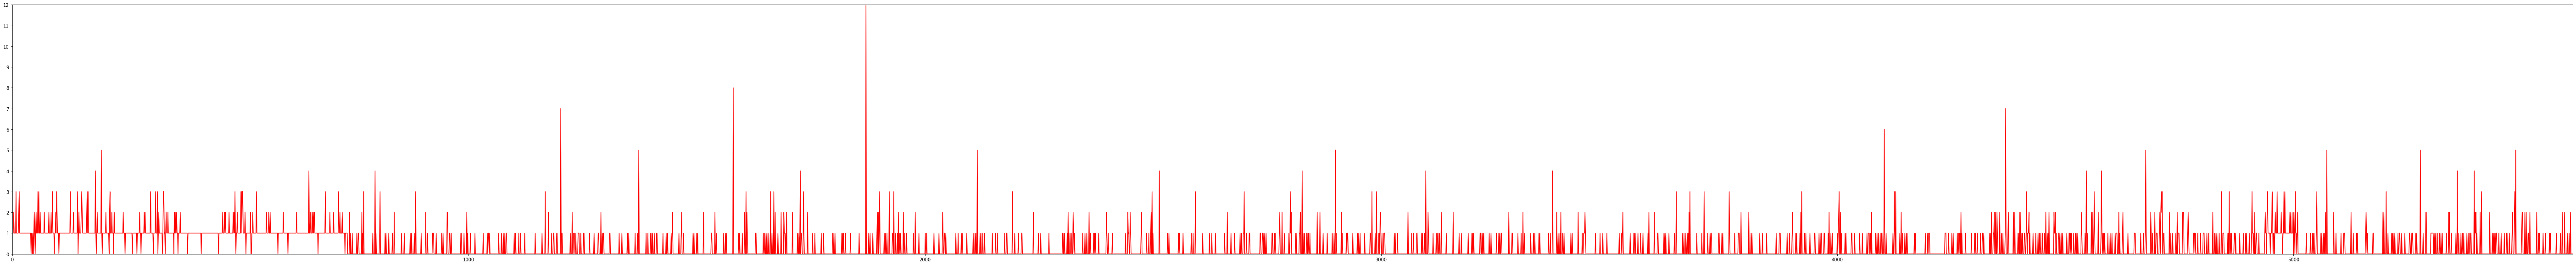

In [29]:
draw_graphics(moscow2016_dead, 'r', '2016_dead')

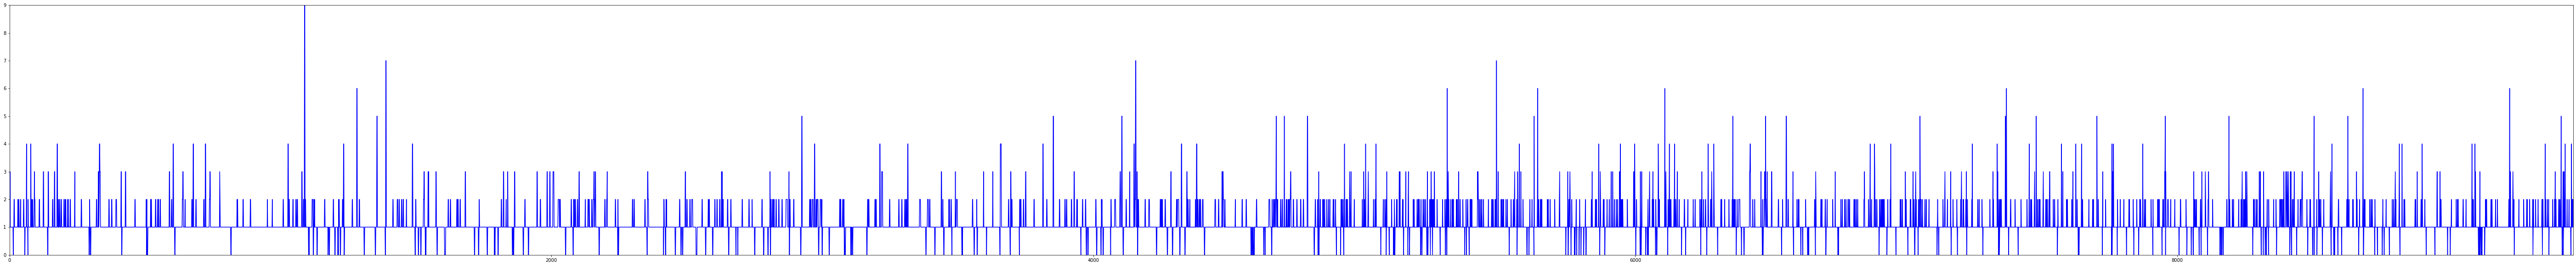

In [30]:
draw_graphics(moscow2017_dead, 'b', '2017_dead')

In [0]:
def get_frequency(sr):
    sr = sr.sort_values()
    c = collections.Counter(sr)
    return c

In [17]:
moscow2016_frequency = get_frequency(moscow2016_dead)
moscow2016_frequency

Counter({0: 3955,
         1: 1370,
         2: 195,
         3: 68,
         4: 12,
         5: 8,
         6: 1,
         7: 2,
         8: 1,
         12: 1})

In [18]:
moscow2017_frequency = get_frequency(moscow2017_dead)
moscow2017_frequency

Counter({0: 367, 1: 7876, 2: 909, 3: 198, 4: 71, 5: 26, 6: 8, 7: 5, 9: 2})

In [19]:
data = pd.DataFrame(data=[moscow2016_frequency, moscow2017_frequency])
data

,0,1,2,3,4,5,6,7,8,12,9
0,3955,1370,195,68,12,8,1,2,1.0,1.0,NaN
1,367,7876,909,198,71,26,8,5,NaN,NaN,2.0


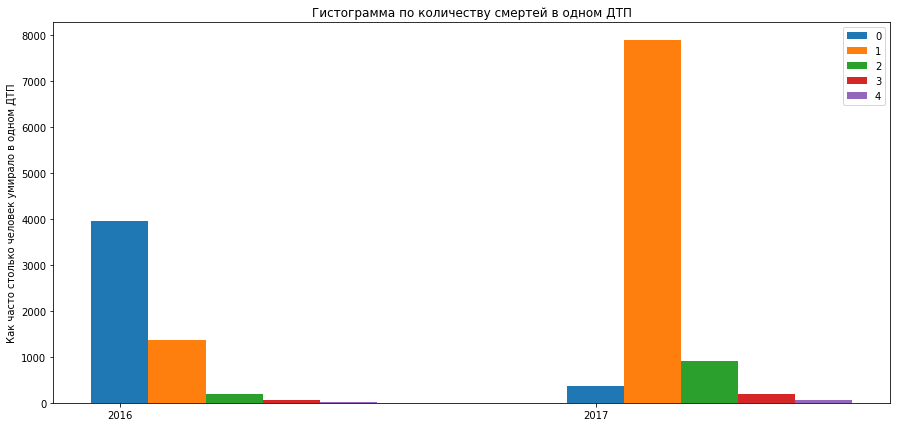

In [20]:
data = pd.DataFrame(data=[moscow2016_frequency, moscow2017_frequency])
x = np.array([2016, 2017])  
width = 0.12 
fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x, data[0], width, label='0')
rects2 = ax.bar(x + width * 1, data[1], width, label='1')
rects3 = ax.bar(x + width * 2, data[2], width, label='2')
rects4 = ax.bar(x + width * 3, data[3], width, label='3')
rects5 = ax.bar(x + width * 4, data[4], width, label='4')
ax.set_ylabel('Как часто столько человек умирало в одном ДТП')
ax.set_xticks(x)
ax.legend()
ax.set_title('Гистограмма по количеству смертей в одном ДТП')
fig.savefig('Fatalities per accident')
plt.show()

Давайте рассмотрим эти данные методом пристального взгляда. Учитывая, что в нашей стране ДТП считается всё: от лёгкого столкновения машин (большинство) до крупных аварий (очень мало), -- то выглядит очень странным, что в среднем в ДТП умирает человек.


In [0]:
def count_types(df):
    c = collections.Counter()
    for i in range(df.shape[0]):
        c[df.iloc[i]['crash_type_name']] += 1
    return c


In [22]:
count_types(moscow2016)

Counter({'': 10,
         'Иной вид ДТП': 7,
         'Наезд на велосипедиста': 163,
         'Наезд на внезапно возникшее препятствие': 2,
         'Наезд на лицо, не являющееся участником дорожного движения(иного участника ДТП), осуществляющее производство работ': 3,
         'Наезд на пешехода': 2050,
         'Наезд на препятствие': 313,
         'Наезд на стоящее ТС': 349,
         'Опрокидывание': 52,
         'Отбрасывание предмета(отсоединение колеса)': 3,
         'Падение пассажира': 213,
         'Столкновение': 2445,
         'Съезд с дороги': 3})

In [23]:
count_types(moscow2017)

Counter({'': 26,
         'Иной вид ДТП': 22,
         'Наезд на велосипедиста': 199,
         'Наезд на внезапно возникшее препятствие': 1,
         'Наезд на животное': 1,
         'Наезд на лицо, не являющееся участником дорожного движения(иного участника ДТП), осуществляющее производство работ': 3,
         'Наезд на пешехода': 3618,
         'Наезд на препятствие': 480,
         'Наезд на стоящее ТС': 466,
         'Опрокидывание': 96,
         'Отбрасывание предмета(отсоединение колеса)': 3,
         'Падение груза': 4,
         'Падение пассажира': 487,
         'Столкновение': 4048,
         'Съезд с дороги': 8})

In [24]:
data = pd.DataFrame(data=[count_types(moscow2016), count_types(moscow2017)])
data

,Столкновение,Наезд на пешехода,Наезд на препятствие,Наезд на стоящее ТС,Падение пассажира,Съезд с дороги,Наезд на велосипедиста,Опрокидывание,"Наезд на лицо, не являющееся участником дорожного движения(иного участника ДТП), осуществляющее производство работ",Иной вид ДТП,Отбрасывание предмета(отсоединение колеса),,Наезд на внезапно возникшее препятствие,Падение груза,Наезд на животное
0,2445,2050,313,349,213,3,163,52,3,7,3,10,2,NaN,NaN
1,4048,3618,480,466,487,8,199,96,3,22,3,26,1,4.0,1.0


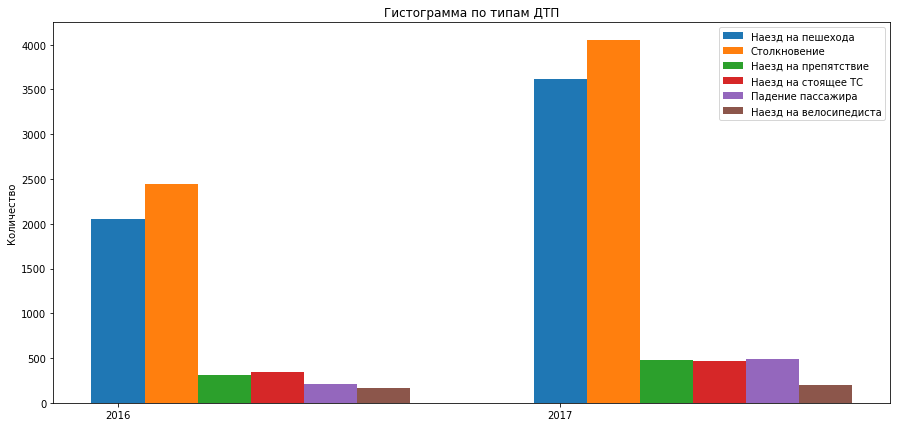

In [25]:
x = np.array([2016, 2017])
width = 0.12 
fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x, data['Наезд на пешехода'], width, label='Наезд на пешехода')
rects2 = ax.bar(x + width, data['Столкновение'], width, label='Столкновение')
rects3 = ax.bar(x + width * 2, data['Наезд на препятствие'], width, label='Наезд на препятствие')
rects4 = ax.bar(x + width * 3, data['Наезд на стоящее ТС'], width, label='Наезд на стоящее ТС')
rects5 = ax.bar(x + width * 4, data['Падение пассажира'], width, label='Падение пассажира')
rects6 = ax.bar(x + width * 5, data['Наезд на велосипедиста'], width, label='Наезд на велосипедиста')

ax.set_ylabel('Количество')
ax.set_xticks(x)
ax.legend()
ax.set_title('Гистограмма по типам ДТП')
fig.savefig('Accident types')
plt.show()